In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Задание 3 / Task 3:
### 1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
### 2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

### 1. Write a function that would automatically add information from an additional file groups_add.csv (titles may vary) and recalculate metrics based on additional parameters.
### 2. Write a function that would plot graphs according to recieved metrics.

In [2]:
def renew_data(main_df = 'groups.csv', add_df = 'groups_add.csv', add_params='checks.csv'):
    main_df = pd.read_csv('~/' + main_df, sep=';')
    add_df = pd.read_csv('~/' + add_df)
    add_params = pd.read_csv('~/' + add_params, sep=';').rename(columns={'student_id': 'id'})
    
    new_df = pd.concat([main_df, add_df], ignore_index=True)
    new_df = new_df.drop_duplicates(subset=['id', 'grp'])
    new_df = new_df.merge(right=add_params, how='left', on='id').fillna(0.0)
    
    control = new_df.query('grp == "A" and rev != 0.0').rev.reset_index(drop=True)
    target = new_df.query('grp == "B" and rev != 0.0').rev.reset_index(drop=True)
    full_control = new_df.query('grp == "A"').rev.reset_index(drop=True)
    full_target = new_df.query('grp == "B"').rev.reset_index(drop=True)
    
    new_df_and_metrics = {'new_df': new_df, 
                          'arppu_control' : round(control.sum() / control.shape[0], 2),
                          'arppu_target': round(target.sum() / target.shape[0], 2), 
                          'arpu_control': round(control.sum() / full_control.shape[0], 2), 
                          'arpu_target': round(target.sum() / full_target.shape[0], 2),
                          'CR_control': round((control.shape[0] / full_control.shape[0]) * 100, 2),
                          'CR_target': round((target.shape[0] / full_target.shape[0]) * 100, 2)}
    
    return new_df_and_metrics

In [3]:
def plot_data(new_df_and_metrics):
    sns.set(
        font_scale=1,
        style="whitegrid",
        rc={'figure.figsize':(17,10)}
            )
    
    arppu_control = new_df_and_metrics["arppu_control"]
    arppu_target = new_df_and_metrics["arppu_target"]
    arpu_control = new_df_and_metrics["arpu_control"]
    arpu_target = new_df_and_metrics["arpu_target"]
    CR_control = new_df_and_metrics["CR_control"]
    CR_target = new_df_and_metrics["CR_target"]
    
    fig, axes = plt.subplots(1, 3)

    sns.barplot(data=pd.DataFrame({'ARPPU': ['ARPPU control', 'ARPPU target'], 'values': [arppu_control, arppu_target], 'group': ['control', 'target']}), x='ARPPU', y='values', hue='group', ax=axes[0]).legend_.remove()
    sns.barplot(data=pd.DataFrame({'ARPU': ['ARPU control', 'ARPU target'], 'values': [arpu_control, arpu_target], 'group': ['control', 'target']}), x='ARPU', y='values', hue='group', ax=axes[1]).legend_.remove()
    sns.barplot(data=pd.DataFrame({'CR': ['CR control', 'CR target'], 'values': [CR_control, CR_target], 'group': ['control', 'target']}), x='CR', y='values', hue='group', ax=axes[2]).legend_.remove()

# Проверка правильности работы функций
# Checking, if the written functions are correct

In [4]:
new_df_and_metrics = renew_data(main_df = 'my_final_project/variant_2/groups.csv', 
                                add_df = 'my_final_project/variant_2/group_add.csv', 
                                add_params='my_final_project/variant_2/checks.csv')

In [5]:
print(f'ARPPU for the control group is {new_df_and_metrics["arppu_control"]}')
print(f'ARPPU for the target group is {new_df_and_metrics["arppu_target"]}')
print()
print(f'ARPU for the control group is {new_df_and_metrics["arpu_control"]}')
print(f'ARPU for the target group is {new_df_and_metrics["arpu_target"]}')
print()
print(f'CR for the control group is {new_df_and_metrics["CR_control"]}%')
print(f'CR for the target group is {new_df_and_metrics["CR_target"]}%')
new_df_and_metrics['new_df'].head()

ARPPU for the control group is 860.71
ARPPU for the target group is 1108.82

ARPU for the control group is 6.27
ARPU for the target group is 8.04

CR for the control group is 0.73%
CR for the target group is 0.72%


,id,grp,rev
0,1489,B,0.0
1,1627,A,990.0
2,1768,B,0.0
3,1783,B,0.0
4,1794,A,0.0


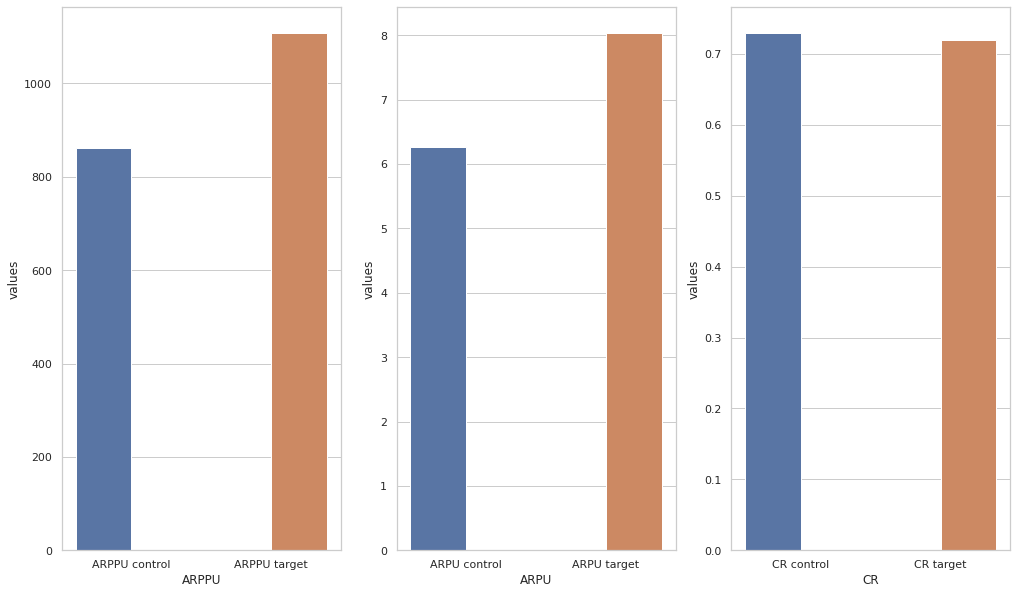

In [6]:
plot_data(new_df_and_metrics)
